In [ ]:
#| hide
from fedai.core import *

# fedai

> A minimalist Library for doing Federated learning research.

This file will become your README and also the index of your documentation.

## Developer Guide

If you are new to using `nbdev` here are some useful pointers to get you started.

### Install fedai in Development mode

```sh
# make sure fedai package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to fedai
$ nbdev_prepare
```

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/Ahmed-Khaled-Saleh/fedai.git
```

or from [conda][conda]

```sh
$ conda install -c Ahmed-Khaled-Saleh fedai
```

or from [pypi][pypi]


```sh
$ pip install fedai
```


[repo]: https://github.com/Ahmed-Khaled-Saleh/fedai
[docs]: https://Ahmed-Khaled-Saleh.github.io/fedai/
[pypi]: https://pypi.org/project/fedai/
[conda]: https://anaconda.org/Ahmed-Khaled-Saleh/fedai

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [conda][conda] and [pypi][pypi] respectively.

[repo]: https://github.com/Ahmed-Khaled-Saleh/fedai
[docs]: https://Ahmed-Khaled-Saleh.github.io/fedai/
[pypi]: https://pypi.org/project/fedai/
[conda]: https://anaconda.org/Ahmed-Khaled-Saleh/fedai

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
#| export
import os
import numpy as np
from datetime import datetime
from fedai.servers import *
from fedai.clients import *
from fedai.utils import *
from omegaconf import DictConfig, OmegaConf
import hydra
import argparse



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/ahmed/miniconda3/envs/fedai/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ahmed/miniconda3/envs/fedai/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/ahmed/miniconda3/envs/fedai/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ahmed/miniconda3/envs/fedai/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, 

AttributeError: _ARRAY_API not found

RuntimeError: Failed to import transformers.models.bloom.modeling_bloom because of the following error (look up to see its traceback):
numpy.core.multiarray failed to import

This is an example of how you can extract the basename and the parent dir name to path them to hydra's main.

#### Hydra as our config manager

In [ ]:
path = 'folder/config/config.yaml'
config_path = os.path.dirname(path)
config_name = os.path.basename(path)
config_name = os.path.splitext(config_name)[0]

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument(
    '--fname', type=str,
    help='name of config file to load',
    default='configs.yaml')

fname = parser.parse_args().fname
config_path = os.path.dirname(fname)
config_name = os.path.splitext(os.path.basename(config_path))[0]

In [ ]:
@hydra.main(version_base=None, config_path=config_path, config_name=config_name)
def app(cfg: DictConfig) -> None:
    print(OmegaConf.to_yaml(cfg))
    loss_ds, gener_ds = load_ds(cfg)
    list_train_ds, list_eval_ds, tokenizer, datacollator = loss_ds
    list_train_ds_genr, list_eval_ds_genr = gener_ds
    

usage: ipykernel_launcher.py [--help] [--hydra-help] [--version]
                             [--cfg {job,hydra,all}] [--resolve]
                             [--package PACKAGE] [--run] [--multirun]
                             [--shell-completion] [--config-path CONFIG_PATH]
                             [--config-name CONFIG_NAME]
                             [--config-dir CONFIG_DIR]
                             [--experimental-rerun EXPERIMENTAL_RERUN]
                             [--info [{all,config,defaults,defaults-tree,plugins,searchpath}]]
                             [overrides ...]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/ahmed/.local/share/jupyter/runtime/kernel-v345b718cf6313858386357bb42dd52bcafd1180c9.json


SystemExit: 2

/home/ahmed/miniconda3/envs/fedai/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#### Test main


In [ ]:
from fedai.core import *

In [ ]:
from fedai.data import get_dolly
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
dolly = get_dolly('', tokenizer)

In [ ]:
(lst_train_ds, lst_eval_set, tokenizer, data_collator), (lst_train_ds_genr, lst_eval_set_genr)  = dolly

In [ ]:
lst_data_dict = [{'train': tr, 'test': test} for tr, test in zip(lst_train_ds, lst_eval_set)]
lst_data_dict_genr = [{'train': tr, 'test': test} for tr, test in zip(lst_train_ds_genr, lst_eval_set_genr)]

In [ ]:
len(lst_data_dict) == len(lst_data_dict_genr)

True

In [ ]:
def criterion(y_pred, y_true= None):
    loss = y_pred.loss
    return loss

In [ ]:
kwargs = {'lst_gen_data_dict': lst_data_dict_genr,
          'tokenizer': tokenizer,
          'collat_fn': data_collator,
          'criterion': criterion
          }

In [ ]:
from fedai.core import get_cfg
cfg = get_cfg()
cfg

{'dataset': 'dolly', 'model': 'openai-community/gpt2', 'max_length': 1022, 'num_clients': 80, 'iid': 'dir0.5', 'batch_size': 1, 'dataset_subsample': 1.0, 'eval_metric': 'loss', 'log_root': 'logs', 'save_dir': 'checkpoints', 'lora_alpha': 8, 'lora_dropout': 0.05, 'r': 32, 'target_modules': ['c_attn'], 'lr': 5e-05, 'optimizer': 'Adam', 'name': 'mira', 'device': 0, 'bias_sampling': False, 'num_clients_per_task': 10, 'use_prompts': True, 'rounds': 40, 'm': 0.05}

In [ ]:
cfg.log_dir = os.path.join(cfg.log_root, 
                            datetime.now().strftime("%Y%m%d_%H%M%S"))
        
cfg.save_dir = os.path.join(cfg.save_dir, 
                            datetime.now().strftime("%Y%m%d_%H%M%S"))

In [ ]:
len(lst_data_dict)

80

In [ ]:
server = get_server(cfg, lst_data_dict, model= None, holdout_ds= None, **kwargs)

/home/ahmed/miniconda3/envs/fedai/lib/python3.10/site-packages/peft/tuners/lora/layer.py:1150: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [ ]:
server.client_list = LazyInit(server, Client_mira)


In [ ]:
client_indices_rounds = get_client_indices_rounds(cfg)

In [ ]:
len(client_indices_rounds)

40

In [ ]:
# for t in range(1, 41):
#     clients_history = []
#     local_ds_len = {}
#     prev_clients = set()    
#     for client in server.get_selected_client(client_indices_rounds[t-1]):
#         client.model = server.send_model(client)
#         client.init_local_train("self.output_dir")
#         client.optimizer = get_class('torch.optim', server.cfg.optimizer)(client.model.parameters(), lr= server.cfg.lr)
#         history = [0]# training happens at this step
#         client.model, local_ds_len, prev_clients, _ = client.terminate_local_train(t, local_ds_len, prev_clients)
#         clients_history.append(history)
#         print(f"client {client.idx} finished round {t}")
#         del client#server.save_space(client)
#         server.client_list.clear_cache()
#         import gc
#         gc.collect()

client 31 finished round 1
client 71 finished round 1
client 44 finished round 1
client 20 finished round 1
client 28 finished round 2
client 37 finished round 2
client 24 finished round 2
client 30 finished round 2
client 73 finished round 3
client 58 finished round 3
client 29 finished round 3
client 1 finished round 3
client 8 finished round 4
client 76 finished round 4
client 57 finished round 4
client 47 finished round 4
client 28 finished round 5
client 39 finished round 5
client 37 finished round 5
client 63 finished round 5
client 65 finished round 6
client 70 finished round 6
client 8 finished round 6
client 16 finished round 6
client 51 finished round 7
client 32 finished round 7
client 38 finished round 7
client 47 finished round 7
client 30 finished round 8
client 37 finished round 8
client 51 finished round 8
client 78 finished round 8
client 38 finished round 9
client 51 finished round 9
client 18 finished round 9
client 57 finished round 9
client 29 finished round 10
cli

In [ ]:
# len(server.model.state_dict().keys())

149

In [ ]:
# #| hide
# from IPython.display import display, Markdown

# keys_list = "\n".join(f"- {key}" for key in server.model.state_dict().keys())
# display(Markdown(keys_list))

- transformer.wte.weight
- transformer.wpe.weight
- transformer.h.0.ln_1.weight
- transformer.h.0.ln_1.bias
- transformer.h.0.attn.c_attn.weight
- transformer.h.0.attn.c_attn.bias
- transformer.h.0.attn.c_proj.weight
- transformer.h.0.attn.c_proj.bias
- transformer.h.0.ln_2.weight
- transformer.h.0.ln_2.bias
- transformer.h.0.mlp.c_fc.weight
- transformer.h.0.mlp.c_fc.bias
- transformer.h.0.mlp.c_proj.weight
- transformer.h.0.mlp.c_proj.bias
- transformer.h.1.ln_1.weight
- transformer.h.1.ln_1.bias
- transformer.h.1.attn.c_attn.weight
- transformer.h.1.attn.c_attn.bias
- transformer.h.1.attn.c_proj.weight
- transformer.h.1.attn.c_proj.bias
- transformer.h.1.ln_2.weight
- transformer.h.1.ln_2.bias
- transformer.h.1.mlp.c_fc.weight
- transformer.h.1.mlp.c_fc.bias
- transformer.h.1.mlp.c_proj.weight
- transformer.h.1.mlp.c_proj.bias
- transformer.h.2.ln_1.weight
- transformer.h.2.ln_1.bias
- transformer.h.2.attn.c_attn.weight
- transformer.h.2.attn.c_attn.bias
- transformer.h.2.attn.c_proj.weight
- transformer.h.2.attn.c_proj.bias
- transformer.h.2.ln_2.weight
- transformer.h.2.ln_2.bias
- transformer.h.2.mlp.c_fc.weight
- transformer.h.2.mlp.c_fc.bias
- transformer.h.2.mlp.c_proj.weight
- transformer.h.2.mlp.c_proj.bias
- transformer.h.3.ln_1.weight
- transformer.h.3.ln_1.bias
- transformer.h.3.attn.c_attn.weight
- transformer.h.3.attn.c_attn.bias
- transformer.h.3.attn.c_proj.weight
- transformer.h.3.attn.c_proj.bias
- transformer.h.3.ln_2.weight
- transformer.h.3.ln_2.bias
- transformer.h.3.mlp.c_fc.weight
- transformer.h.3.mlp.c_fc.bias
- transformer.h.3.mlp.c_proj.weight
- transformer.h.3.mlp.c_proj.bias
- transformer.h.4.ln_1.weight
- transformer.h.4.ln_1.bias
- transformer.h.4.attn.c_attn.weight
- transformer.h.4.attn.c_attn.bias
- transformer.h.4.attn.c_proj.weight
- transformer.h.4.attn.c_proj.bias
- transformer.h.4.ln_2.weight
- transformer.h.4.ln_2.bias
- transformer.h.4.mlp.c_fc.weight
- transformer.h.4.mlp.c_fc.bias
- transformer.h.4.mlp.c_proj.weight
- transformer.h.4.mlp.c_proj.bias
- transformer.h.5.ln_1.weight
- transformer.h.5.ln_1.bias
- transformer.h.5.attn.c_attn.weight
- transformer.h.5.attn.c_attn.bias
- transformer.h.5.attn.c_proj.weight
- transformer.h.5.attn.c_proj.bias
- transformer.h.5.ln_2.weight
- transformer.h.5.ln_2.bias
- transformer.h.5.mlp.c_fc.weight
- transformer.h.5.mlp.c_fc.bias
- transformer.h.5.mlp.c_proj.weight
- transformer.h.5.mlp.c_proj.bias
- transformer.h.6.ln_1.weight
- transformer.h.6.ln_1.bias
- transformer.h.6.attn.c_attn.weight
- transformer.h.6.attn.c_attn.bias
- transformer.h.6.attn.c_proj.weight
- transformer.h.6.attn.c_proj.bias
- transformer.h.6.ln_2.weight
- transformer.h.6.ln_2.bias
- transformer.h.6.mlp.c_fc.weight
- transformer.h.6.mlp.c_fc.bias
- transformer.h.6.mlp.c_proj.weight
- transformer.h.6.mlp.c_proj.bias
- transformer.h.7.ln_1.weight
- transformer.h.7.ln_1.bias
- transformer.h.7.attn.c_attn.weight
- transformer.h.7.attn.c_attn.bias
- transformer.h.7.attn.c_proj.weight
- transformer.h.7.attn.c_proj.bias
- transformer.h.7.ln_2.weight
- transformer.h.7.ln_2.bias
- transformer.h.7.mlp.c_fc.weight
- transformer.h.7.mlp.c_fc.bias
- transformer.h.7.mlp.c_proj.weight
- transformer.h.7.mlp.c_proj.bias
- transformer.h.8.ln_1.weight
- transformer.h.8.ln_1.bias
- transformer.h.8.attn.c_attn.weight
- transformer.h.8.attn.c_attn.bias
- transformer.h.8.attn.c_proj.weight
- transformer.h.8.attn.c_proj.bias
- transformer.h.8.ln_2.weight
- transformer.h.8.ln_2.bias
- transformer.h.8.mlp.c_fc.weight
- transformer.h.8.mlp.c_fc.bias
- transformer.h.8.mlp.c_proj.weight
- transformer.h.8.mlp.c_proj.bias
- transformer.h.9.ln_1.weight
- transformer.h.9.ln_1.bias
- transformer.h.9.attn.c_attn.weight
- transformer.h.9.attn.c_attn.bias
- transformer.h.9.attn.c_proj.weight
- transformer.h.9.attn.c_proj.bias
- transformer.h.9.ln_2.weight
- transformer.h.9.ln_2.bias
- transformer.h.9.mlp.c_fc.weight
- transformer.h.9.mlp.c_fc.bias
- transformer.h.9.mlp.c_proj.weight
- transformer.h.9.mlp.c_proj.bias
- transformer.h.10.ln_1.weight
- transformer.h.10.ln_1.bias
- transformer.h.10.attn.c_attn.weight
- transformer.h.10.attn.c_attn.bias
- transformer.h.10.attn.c_proj.weight
- transformer.h.10.attn.c_proj.bias
- transformer.h.10.ln_2.weight
- transformer.h.10.ln_2.bias
- transformer.h.10.mlp.c_fc.weight
- transformer.h.10.mlp.c_fc.bias
- transformer.h.10.mlp.c_proj.weight
- transformer.h.10.mlp.c_proj.bias
- transformer.h.11.ln_1.weight
- transformer.h.11.ln_1.bias
- transformer.h.11.attn.c_attn.weight
- transformer.h.11.attn.c_attn.bias
- transformer.h.11.attn.c_proj.weight
- transformer.h.11.attn.c_proj.bias
- transformer.h.11.ln_2.weight
- transformer.h.11.ln_2.bias
- transformer.h.11.mlp.c_fc.weight
- transformer.h.11.mlp.c_fc.bias
- transformer.h.11.mlp.c_proj.weight
- transformer.h.11.mlp.c_proj.bias
- transformer.ln_f.weight
- transformer.ln_f.bias
- lm_head.weight

In [ ]:
# from peft import *
# peft_config = LoraConfig(
#     lora_alpha=cfg.lora_alpha,
#     lora_dropout=cfg.lora_dropout,
#     r=cfg.r,
#     target_modules=cfg.target_modules
# )
# peft_model = get_peft_model(model,peft_config)

/home/ahmed/miniconda3/envs/fedai/lib/python3.10/site-packages/peft/tuners/lora/layer.py:1150: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


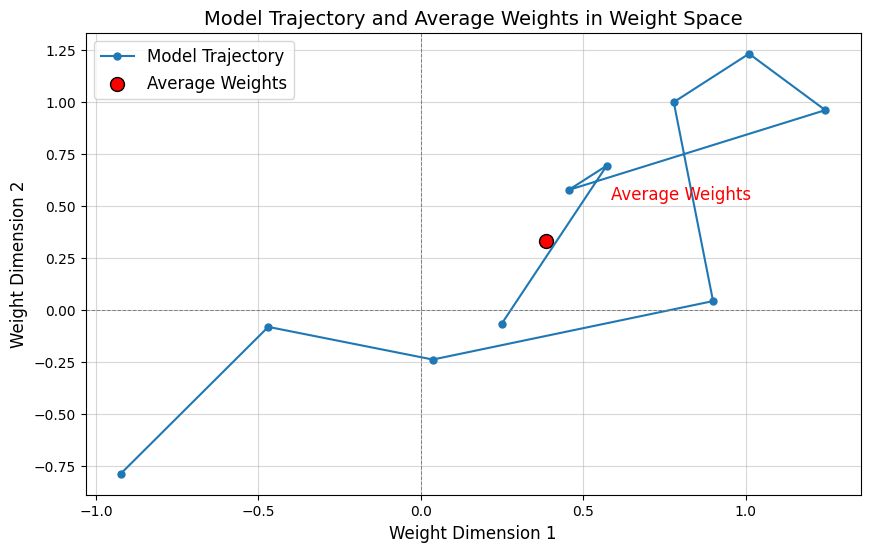

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a model trajectory in a 2D weight space for visualization
np.random.seed(42)
steps = 10
trajectory = np.cumsum(np.random.randn(steps, 2) * 0.5, axis=0)

# Compute the average weights
average_weights = np.mean(trajectory, axis=0)

# Plot the trajectory and the average
plt.figure(figsize=(10, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', label='Model Trajectory', markersize=5)
plt.scatter(*average_weights, color='red', label='Average Weights', s=100, edgecolor='black')

# Annotate the average weights
plt.text(average_weights[0] + 0.2, average_weights[1] + 0.2, 'Average Weights', fontsize=12, color='red')

# Add plot details
plt.title('Model Trajectory and Average Weights in Weight Space', fontsize=14)
plt.xlabel('Weight Dimension 1', fontsize=12)
plt.ylabel('Weight Dimension 2', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


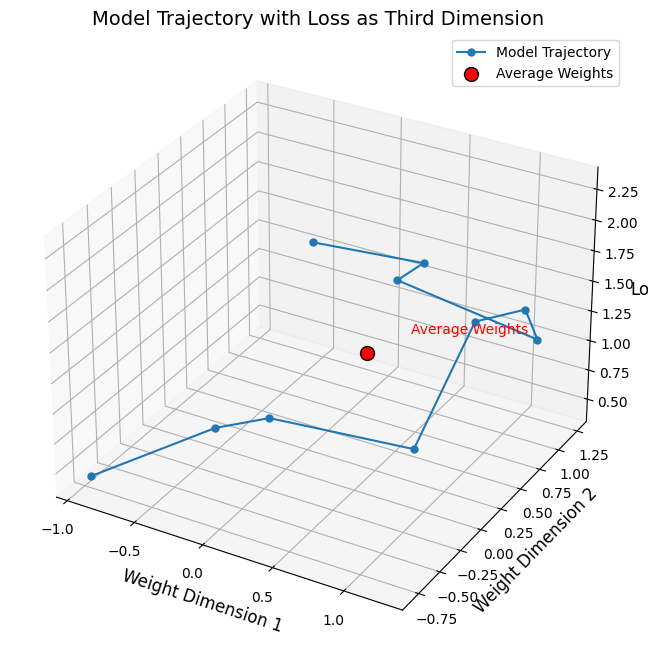

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Simulate a loss value corresponding to each step in the trajectory
loss_values = np.linspace(2, 0.5, steps) + 0.2 * np.random.randn(steps)

# Plot the trajectory in 3D with loss as the third dimension
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Trajectory points
ax.plot(trajectory[:, 0], trajectory[:, 1], loss_values, '-o', label='Model Trajectory', markersize=5)

# Average weights and corresponding average loss
average_loss = np.mean(loss_values)
ax.scatter(*average_weights, average_loss, color='red', label='Average Weights', s=100, edgecolor='black')

# Annotate the average weights
ax.text(average_weights[0] + 0.2, average_weights[1] + 0.2, average_loss + 0.1, 'Average Weights', fontsize=10, color='red')

# Add axis labels and title
ax.set_title('Model Trajectory with Loss as Third Dimension', fontsize=14)
ax.set_xlabel('Weight Dimension 1', fontsize=12)
ax.set_ylabel('Weight Dimension 2', fontsize=12)
ax.set_zlabel('Loss', fontsize=12)

# Add grid and legend
ax.grid(alpha=0.5)
ax.legend(fontsize=10)
plt.show()
